In [1]:
import numpy as np 
import pandas as pd

from matplotlib import pyplot as plt

# Question 1

- [Lecture 13-14](https://classroom.google.com/c/NTk2NDk0MDcwMzYx/p/NTk2NTA0NDEyMzc4/details) both video and presentation
- Global weights: - materials/lecture_notes.pdf pages: 22 - 23

In [40]:
R = np.array([
    [0.6, 0.1, 0.5],
    [0.3, 0.4, 0.3],
    [0.1, 0.5, 0.2]
])
W = np.array([0.22, 0.6, 0.18])
W_names = [
    "Швидкість",
    "Гнучкість",
    "Трудоємкість"
]

## distributive synthesis

In [41]:
D_W = (R @ W)
D_W

array([0.282, 0.36 , 0.358])

## multiplicative synthesis

In [42]:
M_W = np.prod(np.power(R, W[None]), axis=1)
M_W = M_W / M_W.sum()
M_W

array([0.23251453, 0.41833742, 0.34914805])

# Gradient graph method

In [48]:
def adjust_weights(weights, index, new_value):
    if new_value < 0 or new_value > 1:
        raise ValueError("New value must be between 0 and 1")
    
    # Create a copy of the weights array to avoid modifying the original
    new_weights = np.copy(weights)
    current_value = new_weights[index]
    delta = new_value - current_value
    if delta == 0:
        return new_weights  # No change needed
    
    # Scale other weights
    scale = (1 - new_value) / (1 - current_value)
    for i, weight in enumerate(new_weights):
        if i != index:
            new_weights[i] *= scale
    
    # Set the new value to the specified index
    new_weights[index] = new_value
    
    # Ensure that rounding errors do not affect the sum
    new_weights /= new_weights.sum()
    
    return new_weights

def distr_glob_weight_from_crit_weight(
    input_R,
    input_W,
    c_i,
    c_val
):
    return input_R @ adjust_weights(input_W, c_i, c_val)

def plot_series(data, x, title, reference_weight):
    # Check if the data and x dimensions are compatible
    if data.shape[0] != len(x):
        raise ValueError("Length of x does not match the number of rows in data.")
    
    plt.figure(figsize=(10, 6))
    # Plotting all series on the same graph
    for i in range(data.shape[1]):
        plt.plot(x, data[:, i], marker='o', label=f'a_{i+1}')
    
    # Adding vertical lines for each x
    for xc in x:
        plt.axvline(x=xc, color='gray', linestyle='--', alpha=0.5)
    
    # Adding the reference weight vertical line
    plt.axvline(x=reference_weight, color='red', label='Початкова Вага')
    
    plt.xlabel('Вага критерію')
    plt.ylabel('Вага глобальної алтернативи')
    plt.title(title)
    plt.legend()
    plt.tight_layout()

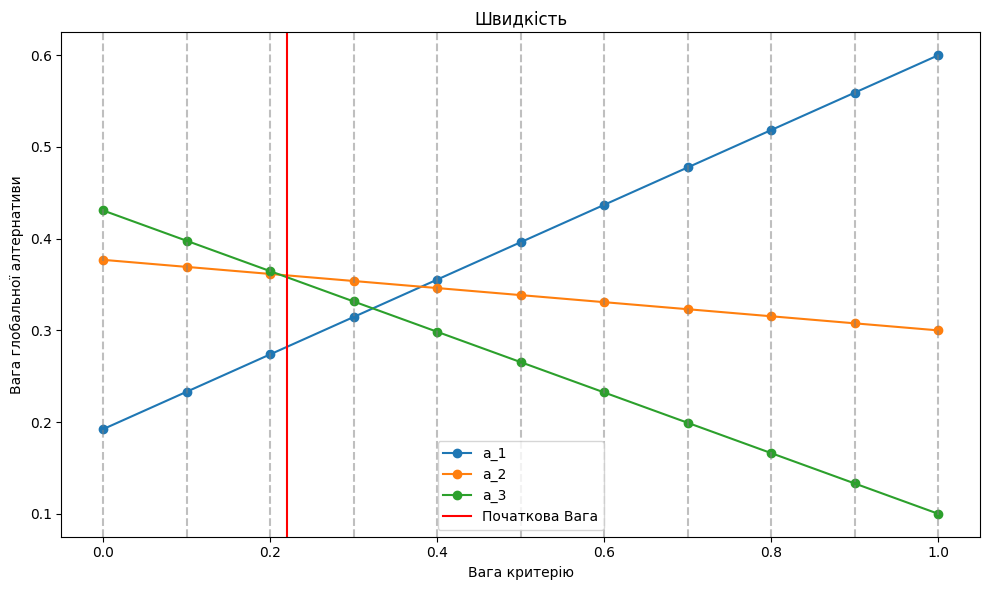

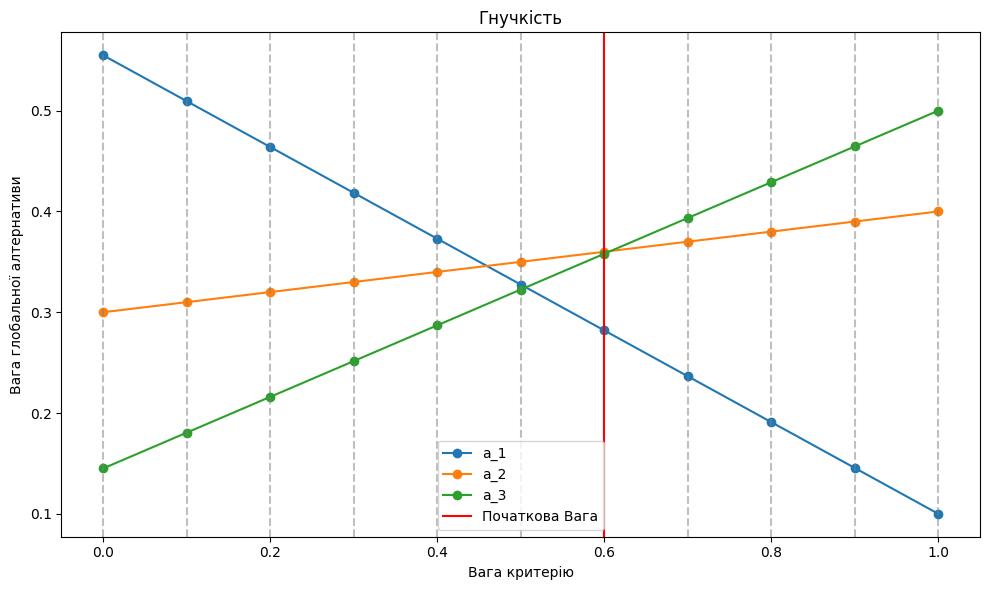

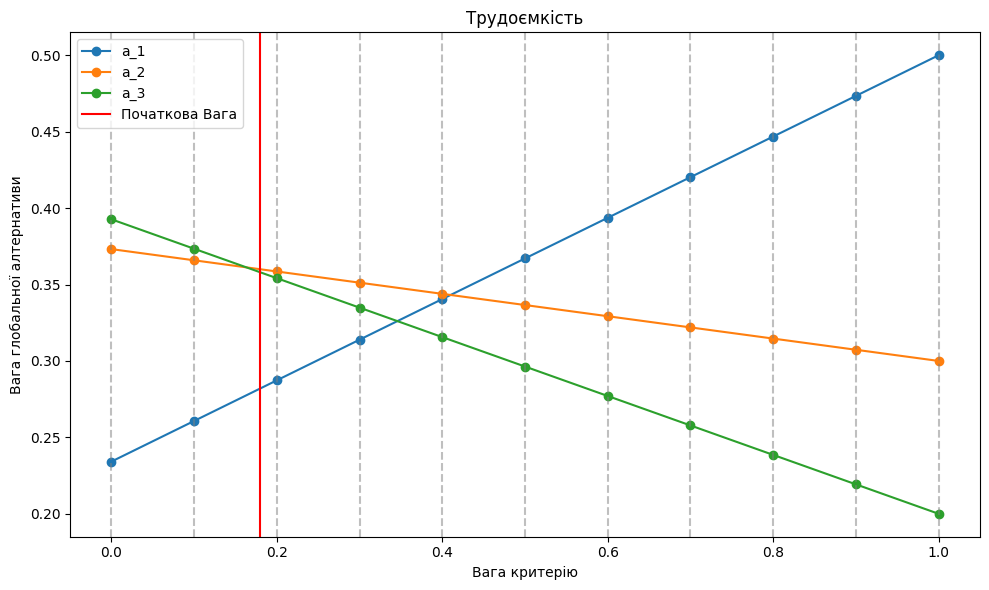

In [53]:
weights_grid = np.arange(0,1.1,0.1)
for crit_id in range(len(W)):
    alter_dep_on_weights = np.stack([
        distr_glob_weight_from_crit_weight(R,W,crit_id,w) for w in weights_grid
    ])
    plot_series(
        alter_dep_on_weights,
        weights_grid,
        W_names[crit_id],
        W[crit_id]
    )

# Question 2

- materials/Pankr_Nedashkov_posibnik.pdf (ст. 137; 141-143)
- materials/Lections_ISPPR_15-17_fuzzy_DSS_1.pdf (ст. 13-27)